# Installation des bibliothèque necessaires

In [4]:
! pip install textblob_fr


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Importation des bibliothèques necessaires


In [29]:
import pandas as pd
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
import re
import string
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())
import plotly.graph_objects as go
import plotly.express as px

In [30]:
import spacy
from spacy.lang.fr.stop_words import STOP_WORDS

# Chargement de la dataset


In [31]:
data = pd.read_csv('Comments.csv')
data.head()

,Unnamed: 0,Name,Comment,Month,Year
0,0,Réassurez-moi,Ravi ! La recherche et la comparaison des mutu...,8,2019
1,1,Réassurez-moi,Très satisfaite ! Un conseiller à l'écoute et ...,8,2019
2,2,Réassurez-moi,Je vous avais contacté pour la mise en place e...,8,2019
3,3,Réassurez-moi,Quelques mots sur Réassurez-moi. Je suis très ...,8,2019
4,4,Réassurez-moi,Votre cabinet m'a permis de pouvoir bénéficier...,8,2019


# Nettoyage des données


In [32]:
# Suppression de la colonne
data= data.drop(['Unnamed: 0'],axis=1)

In [33]:
# Conversion des commentaires en minuscule
data["Comment"]= data["Comment"].str.lower()

In [34]:
# Nombre de ligne avant suppression des lignes avec commentaire vide
before_cleanup = len(data)
print(f'Nombre de lignes avant suppression des doublons : {before_cleanup}')


Nombre de lignes avant suppression des doublons : 11017


In [36]:
# Nombre de valeur nulle par colonne
null_counts = data.isnull().sum()

print(null_counts)

Name        0
Comment    16
Month       0
Year        0
dtype: int64


In [37]:
# Suppression des lignes contenant des commentaires vides
data_initial = data.copy()
data.dropna(subset=['Comment'], inplace=True)

In [38]:
# Nombre de ligne après suppression des lignes avec commentaire vide
after_cleanup = len(data)
print(f'Nombre de lignes avant suppression des doublons : {after_cleanup}')

Nombre de lignes avant suppression des doublons : 11001


# Visualisation importante avant la classification des commentaires


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns


## Nombre de commentaire par année


In [40]:
comment_count_per_year = data.groupby('Year').size().reset_index(name='comment_number')
print(comment_count_per_year)

    Year  comment_number
0   2008              40
1   2009             461
2   2010             516
3   2011             425
4   2012             973
5   2013             868
6   2014             717
7   2015             642
8   2016            1365
9   2017            1146
10  2018            1594
11  2019            1761
12  2020             493


C:\Users\ROYAL COMPUTER\AppData\Local\Temp\ipykernel_20104\1757401144.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




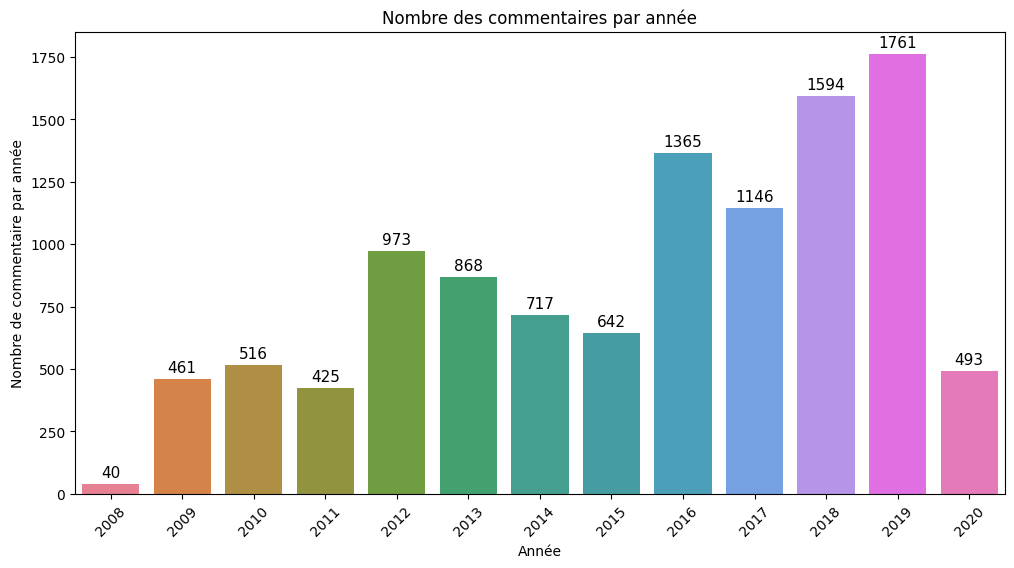

In [42]:

# Création de palette de couleurs variée basée sur le nombre unique d'année'
palette = sns.color_palette('husl', len(data['Year'].unique()))

# Création du graphique de distribution de nombre de commentaire par année
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=data, x='Year', palette=palette)

# Ajout des annotations pour les effectifs sur chaque barre
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline',
                fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

# Configuration du titre et la rotation des étiquettes de l'axe des x
plt.title('Nombre des commentaires par année')
plt.xticks(rotation=45)

# Ajout des étiquettes pour les axes X et Y
plt.xlabel('Année')
plt.ylabel('Nombre de commentaire par année')

plt.xticks(rotation=45)
plt.show()


## Nombre de commentaire par insurance

In [43]:
comment_count_per_insurance= data.groupby('Name').size().reset_index(name='comment_number')
print(comment_count_per_insurance)

                   Name  comment_number
0                7assur              72
1        Adrea Mutuelle             110
2      Ag2r La Mondiale             357
3               Allianz             264
4                Alptis             437
5                Apicil             246
6                 April             380
7                Apréva              69
8                 Assor             149
9                 Aviva             161
10                  Axa             227
11                  CIC              60
12               Cardif              63
13    Cegema Assurances             136
14        Crédit Mutuel             115
15       Eca Assurances             294
16             Eovi Mcd             128
17                  Gan              74
18             Generali             277
19          Gras Savoye             165
20             Groupama             238
21        Groupe Henner             129
22           Génération             110
23   Harmonie Mutuelles             434


# Traitement des données


In [45]:
# Tokenisation des commentaires et Suppression des ponctuations


AComment=[]
for comment in data["Comment"].apply(str):
    Word_Tok = []
    for word in  re.sub("\W"," ",comment ).split():
        Word_Tok.append(word)
    AComment.append(Word_Tok)

# Ajout d'une colonne pour contenir le résultat de la tokénisation
data["Word_Tok"]= AComment
data.head()


<>:7: SyntaxWarning:

invalid escape sequence '\W'

<>:7: SyntaxWarning:

invalid escape sequence '\W'

C:\Users\ROYAL COMPUTER\AppData\Local\Temp\ipykernel_20104\1763655725.py:7: SyntaxWarning:

invalid escape sequence '\W'



,Name,Comment,Month,Year,Word_Tok
0,Réassurez-moi,ravi ! la recherche et la comparaison des mutu...,8,2019,"[ravi, la, recherche, et, la, comparaison, des..."
1,Réassurez-moi,très satisfaite ! un conseiller à l'écoute et ...,8,2019,"[très, satisfaite, un, conseiller, à, l, écout..."
2,Réassurez-moi,je vous avais contacté pour la mise en place e...,8,2019,"[je, vous, avais, contacté, pour, la, mise, en..."
3,Réassurez-moi,quelques mots sur réassurez-moi. je suis très ...,8,2019,"[quelques, mots, sur, réassurez, moi, je, suis..."
4,Réassurez-moi,votre cabinet m'a permis de pouvoir bénéficier...,8,2019,"[votre, cabinet, m, a, permis, de, pouvoir, bé..."


In [46]:
# Suppression des mots vides à ne pas inclure dans le mots vides par defaut de spacy

stop_words=set(STOP_WORDS)

deselect_stop_words = ['n\'', 'ne','pas','plus','personne','aucun','ni','aucune','rien']
for w in deselect_stop_words:
    if w in stop_words:
        stop_words.remove(w)
    else:
        continue



In [47]:
# Application de la suppression dans les commentaires préablement tokenisés

AllfilteredComment=[]
for comment in data["Word_Tok"]:
    filteredComment = [w for w in comment if not ((w in stop_words) or (len(w) == 1))]
    AllfilteredComment.append(' '.join(filteredComment))



In [48]:
# Ajout de la colonne issues du filtrage
data["CommentAferPreproc"]=AllfilteredComment
data.head()



,Name,Comment,Month,Year,Word_Tok,CommentAferPreproc
0,Réassurez-moi,ravi ! la recherche et la comparaison des mutu...,8,2019,"[ravi, la, recherche, et, la, comparaison, des...",ravi recherche comparaison mutuelles simples r...
1,Réassurez-moi,très satisfaite ! un conseiller à l'écoute et ...,8,2019,"[très, satisfaite, un, conseiller, à, l, écout...",satisfaite conseiller écoute sympathique bon p...
2,Réassurez-moi,je vous avais contacté pour la mise en place e...,8,2019,"[je, vous, avais, contacté, pour, la, mise, en...",contacté mise place janvier dernier contrat mu...
3,Réassurez-moi,quelques mots sur réassurez-moi. je suis très ...,8,2019,"[quelques, mots, sur, réassurez, moi, je, suis...",mots réassurez satisfait services cabinet trou...
4,Réassurez-moi,votre cabinet m'a permis de pouvoir bénéficier...,8,2019,"[votre, cabinet, m, a, permis, de, pouvoir, bé...",cabinet permis pouvoir bénéficier contrat comp...


In [49]:
# Classification des commentaires par negative,positive ou neutre
senti_list = []
for i in data["CommentAferPreproc"]:
    vs = tb(i).sentiment[0]
    if (vs > 0):
        senti_list.append('Positive')
    elif (vs < 0):
        senti_list.append('Negative')
    else:
        senti_list.append('Neutral')



In [50]:
# Ajout de la colonne sentiment pour catégoriser tout les commentaires

data["sentiment"]=senti_list
data.head()

,Name,Comment,Month,Year,Word_Tok,CommentAferPreproc,sentiment
0,Réassurez-moi,ravi ! la recherche et la comparaison des mutu...,8,2019,"[ravi, la, recherche, et, la, comparaison, des...",ravi recherche comparaison mutuelles simples r...,Positive
1,Réassurez-moi,très satisfaite ! un conseiller à l'écoute et ...,8,2019,"[très, satisfaite, un, conseiller, à, l, écout...",satisfaite conseiller écoute sympathique bon p...,Positive
2,Réassurez-moi,je vous avais contacté pour la mise en place e...,8,2019,"[je, vous, avais, contacté, pour, la, mise, en...",contacté mise place janvier dernier contrat mu...,Positive
3,Réassurez-moi,quelques mots sur réassurez-moi. je suis très ...,8,2019,"[quelques, mots, sur, réassurez, moi, je, suis...",mots réassurez satisfait services cabinet trou...,Positive
4,Réassurez-moi,votre cabinet m'a permis de pouvoir bénéficier...,8,2019,"[votre, cabinet, m, a, permis, de, pouvoir, bé...",cabinet permis pouvoir bénéficier contrat comp...,Positive


In [52]:
data.to_csv('Commentsentiment.csv', index=False)

In [54]:
fig = px.histogram(data, x="sentiment",color="sentiment")
fig.update_layout(
    title_text='Sentiment of reviews',
    xaxis_title_text='Sentiment',
    yaxis_title_text='Count',
    bargap=0.2,
    bargroupgap=0.1
)
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed